# Introduction to Natural Language Processing
## 3. Supervised Learning
### ASI Data Science Fellowship IX - 6th October 2017

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# dictionary of colours for making nice plots later
PARTY_COLOURS = {'trump': '#E91D0E', 'obama': '#00A6EF'}

%matplotlib inline

## Data Cleaning 

In [71]:
import re

def clean_tweet(text):
    # encode tweets as utf-8 strings
    text = text.decode('utf-8')
    # remove commas in numbers (else vectorizer will split on them)
    text = re.sub(r',([0-9])', '\\1', text)
    # sort out HMTL formatting of &
    text = re.sub(r'&amp', 'and', text)
    # sort out # of hashtag
    text = re.sub(r'#','hashtag',text)
    # sort out 'rt'
    #text = re.sub(r'rt ',' ',text)
    # strip urls
    return re.sub(r'http[s]{0,1}://[^\s]*', '', text)

df = pd.read_pickle('tweets.pkl')
df['text'] = df['text'].map(clean_tweet)

## Supervised Learning

Given our vector representations of text data, we can train any number of machine learning models to try and classify Trump vs. Obama tweets. Given that we tend to have very large feature vectors, it's generally good to use models that are not prone to overfitting when you have more features than samples. Naïve Bayes and SVMs are good choices.

**Your task is to try and train the best classifier to distinguish Obama/Trump tweets that you can. We have held out 600 tweets from the dataset which will be used to test your models. Work alone or in teams if you like.**

**At the end of the session everyone who wants to should save their model to disk. The model should be capable of taking an array of tweets (text) and outputting an array of predicted labels.**

**Below is some sample code for building an sklearn pipeline and saving a trained model to disk.** 

0.971527178602


['/project/models/gray_velocity_y3.pkl']

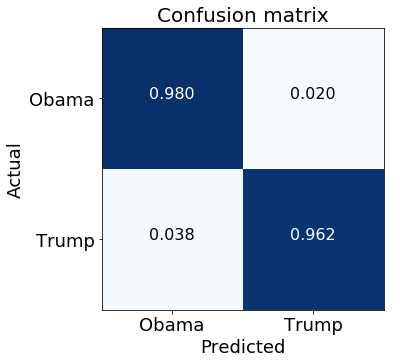

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from asi_nlp.util import plot_confusion_matrix

your_team_name = 'gray_velocity_y3'  # your_name

# create a vectorizer
count_vectorizer = CountVectorizer(
    ngram_range=(1,4), max_features=None, max_df=0.6
)
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000, max_df=0.6, stop_words='english')

# create some classifier
#knn = KNeighborsClassifier()
MNB = MultinomialNB(alpha = 0.3)

# create a pipeline 
clf = Pipeline(
    steps=[('count', count_vectorizer), ('MNB', MNB)]
    #steps = [('tfidf',tfidf),('MNB',MNB)]
)

# do a train/test split to assess our model
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42
)

# train the model
clf.fit(df_train['text'], df_train['label'])

# assess the model
preds = clf.predict(df_test['text'])
f, ax = plot_confusion_matrix(
    df_test['label'], preds, classes=['Obama', 'Trump'], normalize = True
)
print(clf.score(df_test['text'],df_test['label']))
# save model to disk
joblib.dump(
    clf, '/project/models/{}.pkl'.format(your_team_name)
)

In [73]:
count_vectorizer?

In [84]:
clf.predict(['trump'])

array([0])

In [88]:
from sklearn.model_selection import GridSearchCV
MNB_t = MultinomialNB()
param_grid = {'alpha':(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}
clf_t = GridSearchCV(MNB_t,param_grid)
clf_t.fit(df_train['text'],df_train['label'])

ValueError: could not convert string to float: "RT @OFA: Millions of families now have peace of mind thanks to hashtagObamacare. Say you'll fight for it:  "

from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from asi_nlp.util import plot_confusion_matrix

your_team_name = 'gray_velocity_y'  # your_name

# create a vectorizer
count_vectorizer = CountVectorizer(
    ngram_range=(1,1), max_features=100fr, max_df=0.6
)

# create some classifier
#knn = KNeighborsClassifier()

# create a pipeline 
clf = Pipeline(
    steps=[('count', count_vectorizer), ('knn', knn)]
)

# do a train/test split to assess our model
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42
)

# train the model
clf.fit(df_train['text'], df_train['label'])

# assess the model
preds = clf.predict(df_test['text'])
f, ax = plot_confusion_matrix(
    df_test['label'], preds, classes=['Obama', 'Trump']
)

# save model to disk
#joblib.dump(
#    clf, '/project/models/{}.pkl'.format(your_team_name)
#)